# Tensorflow를 이용한 CNN 구성

실행을 위한 모듈 버전 변경

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


## 1. 간단한 Convolution layer 구성

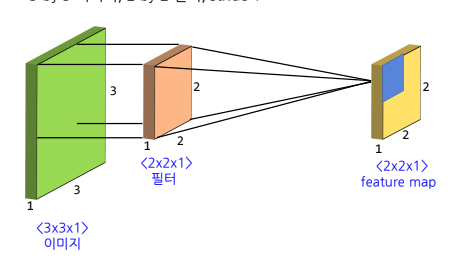

### (1) 필요한 라이브러리 import
- 배열생성을 위한 numpy
- 시각화를위한 matplolib 

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### (2) numpy array를 활용한 image 생성
- 3 by 3 3차원 tensor, Channel은 1개, 하나의 색상만 표현
- 이미지의 개수도 1개 
- Jupyter notebook같은 인터렉티브 파이썬 환경에서의 이용편의성을 위해 InteractiveSession 클래스, Tensor.eval(), Operation.run() 메서드 사용. Session 내에서 변수 계속 유지할 필요 없다.

image.shape (1, 3, 3, 1)


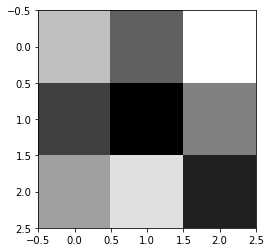

In [ ]:
sess = tf.InteractiveSession()
image = np.array([[[[7],[4],[9]],
                   [[3],[1],[5]], 
                   [[6],[8],[2]]]], dtype=np.float32)
print("image.shape", image.shape)
plt.imshow(image.reshape(3,3), cmap='gray')
# matplotlib에서 제공하는 gray색의 컬러맵으로 이미지 보여줌

### (3) 필터 설정

- 필터크기와 개수는 상관없으나 채널은 같게 해야한다

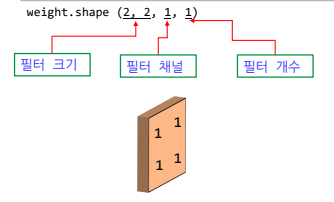

In [ ]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print(weight)
print("weight.shape", weight.shape)

Tensor("Const_1:0", shape=(2, 2, 1, 1), dtype=float32)
weight.shape (2, 2, 1, 1)


### (4) convolution operation

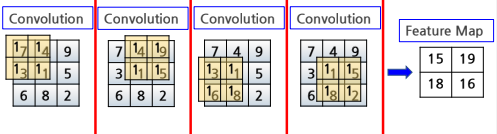

- strides=[1,1,1,1] : 각 차원마다 1씩 움직임
               [batch, height, width, channel]
- padding=‘VALID’ : 패딩없이 operation

In [ ]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval() #바로실행
print(conv2d_img)
print("conv2d_img.shape", conv2d_img.shape)

[[[[15.]
   [19.]]

  [[18.]
   [16.]]]]
conv2d_img.shape (1, 2, 2, 1)


0
[[[15.]
  [19.]]

 [[18.]
  [16.]]]
[[15. 19.]
 [18. 16.]]


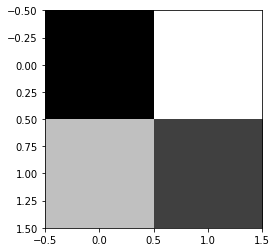

In [ ]:
for i, one_img in enumerate(conv2d_img):
    print(i)
    print(one_img)
    print(one_img.reshape(2,2)) # image로 표시하기위해 2차원으로 변환
    plt.imshow(one_img.reshape(2,2), cmap='gray')

### (5) padding 추가
- padding = same은 입력data와 출력data의 크기가 같게 padding함

weight.shape (2, 2, 1, 1)
image.shape (1, 3, 3, 1)
conv2d_img.shape (1, 3, 3, 1)
[[15. 19. 14.]
 [18. 16.  7.]
 [14. 10.  2.]]


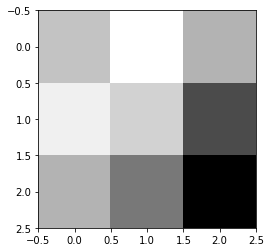

In [ ]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("weight.shape", weight.shape)
print("image.shape", image.shape)
print("conv2d_img.shape", conv2d_img.shape)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.imshow(one_img.reshape(3,3), cmap='gray')

### (6) 2개의 Filter

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 2)
conv2d_img.shape (1, 3, 3, 2)
[[15. 19. 14.]
 [18. 16.  7.]
 [14. 10.  2.]]
[[-15. -19. -14.]
 [-18. -16.  -7.]
 [-14. -10.  -2.]]


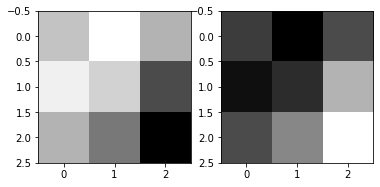

In [ ]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,-1.]],[[1.,-1.]]],
                      [[[1.,-1.]],[[1.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img2 = np.swapaxes(conv2d_img, 0, 3) # image 출력하기 위한 축변경
for i, one_img in enumerate(conv2d_img2):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), 
    plt.imshow(one_img.reshape(3,3), cmap='gray')

## 2. Pooling Layer

### (1) max pooling

```
[[15. 19. 14.]
 [18. 16.  7.]
 [14. 10.  2.]]
[[-15. -19. -14.]
 [-18. -16.  -7.]
 [-14. -10.  -2.]]
 ```

pooling_image.shape (1, 2, 2, 2)
[[19. 19.]
 [18. 16.]]
[[-15.  -7.]
 [-10.  -2.]]


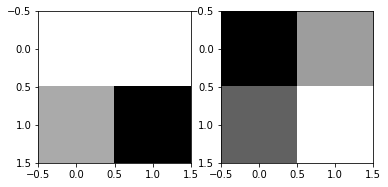

In [ ]:
pool = tf.nn.max_pool(conv2d_img, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
pool_img = pool.eval()
print("pooling_image.shape", pool_img.shape)
pool_p = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_p):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

weight.shape (2, 2, 1, 1)
image.shape (1, 3, 3, 1)
conv2d_img.shape (1, 3, 3, 1)
[[15. 19. 14.]
 [18. 16.  7.]
 [14. 10.  2.]]


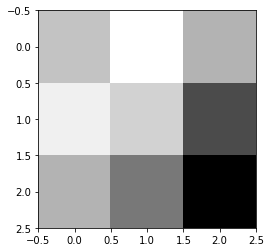

In [ ]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("weight.shape", weight.shape)
print("image.shape", image.shape)
print("conv2d_img.shape", conv2d_img.shape)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.imshow(one_img.reshape(3,3), cmap='gray')



[[[[15.]
   [19.]
   [14.]]

  [[18.]
   [16.]
   [ 7.]]

  [[14.]
   [10.]
   [ 2.]]]]
[[15. 19. 14.]
 [18. 16.  7.]
 [14. 10.  2.]]


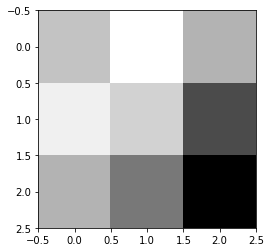

In [ ]:
L2 = tf.nn.relu(conv2d)
L2_img = L2.eval()
print(L2_img)
for i, one_img in enumerate(L2_img):
    print(one_img.reshape(3,3))
    plt.imshow(one_img.reshape(3,3), cmap='gray')


# CNN을 이용한 손글씨 인식(MNIST)
## 1. 전체학습코드

In [ ]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
import datetime

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

tf.reset_default_graph()
tf.set_random_seed(777)  

learning_rate = 0.001
training_cnt = 10
batch_size = 100

keep_prob = tf.placeholder(tf.float32)

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   
Y = tf.placeholder(tf.float32, [None, 10])


W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
b1 = tf.Variable(tf.random_normal([32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.Variable(tf.random_normal([3, 3, 32, 32], stddev=0.01))
b2 = tf.Variable(tf.random_normal([32], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.Variable(tf.random_normal([3, 3, 32, 32], stddev=0.01))
b3 = tf.Variable(tf.random_normal([32], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])

W4 = tf.get_variable("W4", shape=[4 * 4 * 32, 32], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([32]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[32, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

start = datetime.datetime.now();
print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'),'학습을시작합니다!')

for epoch in range(training_cnt):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch: {:04d}, cost = {:.9f}'.format(epoch + 1,avg_cost))

print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'), '학습완료!')
print('총학습시간 : ', datetime.datetime.now() - start )

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label:      ", sess.run(tf.argmax(mnist.test.labels[r:r + 10], 1)))
print("Prediction: ", sess.run( tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 10], keep_prob: 1}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [ ]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:      ", sess.run(tf.argmax(mnist.test.labels[r:r + 10], 1)))
print("Prediction: ", sess.run( tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 10], keep_prob: 1}))

Label:       [7 9 6 9 6 3 7 4 4 5]
Prediction:  [7 9 6 9 6 3 7 4 6 5]


In [ ]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
import datetime

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

tf.reset_default_graph()
tf.set_random_seed(777)  

learning_rate = 0.01
training_cnt = 10
batch_size = 100

keep_prob = tf.placeholder(tf.float32)

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   
Y = tf.placeholder(tf.float32, [None, 10])


W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
b1 = tf.Variable(tf.random_normal([32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.Variable(tf.random_normal([3, 3, 32, 32], stddev=0.01))
b2 = tf.Variable(tf.random_normal([32], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.Variable(tf.random_normal([3, 3, 32, 32], stddev=0.01))
b3 = tf.Variable(tf.random_normal([32], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])

W4 = tf.get_variable("W4", shape=[4 * 4 * 32, 32], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([32]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[32, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

start = datetime.datetime.now();
print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'),'학습을시작합니다!')

for epoch in range(training_cnt):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch: {:04d}, cost = {:.9f}'.format(epoch + 1,avg_cost))

print(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S'), '학습완료!')
print('총학습시간 : ', datetime.datetime.now() - start )

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label:      ", sess.run(tf.argmax(mnist.test.labels[r:r + 10], 1)))
print("Prediction: ", sess.run( tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 10], keep_prob: 1}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
19-11-2020 06:19:47 학습을시작합니다!
Epoch: 0001, cost = 2.366306877
Epoch: 0002, cost = 1.156600326
Epoch: 0003, cost = 0.747867786
Epoch: 0004, cost = 0.652156294
Epoch: 0005, cost = 0.600259302
Epoch: 0006, cost = 0.557213853
Epoch: 0007, cost = 0.514597017
Epoch: 0008, cost = 0.496252651
Epoch: 0009, cost = 0.477980695
Epoch: 0010, cost = 0.468418081
19-11-2020 06:20:05 학습완료!
총학습시간 :  0:00:18.303335
Accuracy: 0.958
Label:       [0 8 1 6 0 7 3 4 7 3]
Prediction:  [0 1 1 6 0 7 3 4 7 8]


## 2. Batch Normalization 적용

In [ ]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
import datetime

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

tf.reset_default_graph()
tf.set_random_seed(777)  

learning_rate = 0.01
training_cnt = 2
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   
Y = tf.placeholder(tf.float32, [None, 10])


W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
b1 = tf.Variable(tf.random_normal([32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
Y1bn = tf.layers.batch_normalization(L1, training=True)
L1 = tf.nn.relu(Y1bn)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 32], stddev=0.01))
b2 = tf.Variable(tf.random_normal([32], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
Y2bn = tf.layers.batch_normalization(L2, training=True)
L2 = tf.nn.relu(Y2bn)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W3 = tf.Variable(tf.random_normal([3, 3, 32, 32], stddev=0.01))
b3 = tf.Variable(tf.random_normal([32], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
Y3bn = tf.layers.batch_normalization(L3, training=True)
L3 = tf.nn.relu(Y3bn)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])

W4 = tf.get_variable("W4", shape=[4 * 4 * 32, 32], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([32], stddev=0.01))

L4 = tf.matmul(L3_flat, W4) + b4
Y4bn = tf.layers.batch_normalization(L4, training=True)
L4 = tf.nn.relu(Y4bn)

W5 = tf.get_variable("W5", shape=[32, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10], stddev=0.01))
logits = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

start = datetime.datetime.now();
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),'학습을시작합니다!')
for epoch in range(training_cnt):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch: {:04d}, cost = {:.9f}'.format(epoch + 1,avg_cost))

print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'), '학습완료!')
print('총학습시간 : ', datetime.datetime.now() - start )

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label:      ", sess.run(tf.argmax(mnist.test.labels[r:r + 10], 1)))
print("Prediction: ", sess.run( tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 10]}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
2020-11-19 06:21:25 학습을시작합니다!
Epoch: 0001, cost = 0.118477935
Epoch: 0002, cost = 0.044193548
2020-11-19 06:21:29 학습완료!
총학습시간 :  0:00:04.419415
Accuracy: 0.9892
Label:       [4 3 3 2 6 7 6 0 0 6]
Prediction:  [4 3 3 2 5 7 6 0 0 6]


In [ ]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
import datetime

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

tf.reset_default_graph()
tf.set_random_seed(777)  

learning_rate = 0.001
training_cnt = 2
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   
Y = tf.placeholder(tf.float32, [None, 10])


W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
b1 = tf.Variable(tf.random_normal([32], stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME') + b1
Y1bn = tf.layers.batch_normalization(L1, training=True)
L1 = tf.nn.relu(Y1bn)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 32], stddev=0.01))
b2 = tf.Variable(tf.random_normal([32], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2
Y2bn = tf.layers.batch_normalization(L2, training=True)
L2 = tf.nn.relu(Y2bn)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W3 = tf.Variable(tf.random_normal([3, 3, 32, 32], stddev=0.01))
b3 = tf.Variable(tf.random_normal([32], stddev=0.01))

L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME') + b3
Y3bn = tf.layers.batch_normalization(L3, training=True)
L3 = tf.nn.relu(Y3bn)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3_flat = tf.reshape(L3, [-1, 4 * 4 * 32])

W4 = tf.get_variable("W4", shape=[4 * 4 * 32, 32], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([32], stddev=0.01))

L4 = tf.matmul(L3_flat, W4) + b4
Y4bn = tf.layers.batch_normalization(L4, training=True)
L4 = tf.nn.relu(Y4bn)

W5 = tf.get_variable("W5", shape=[32, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10], stddev=0.01))
logits = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

start = datetime.datetime.now();
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),'학습을시작합니다!')
for epoch in range(training_cnt):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch: {:04d}, cost = {:.9f}'.format(epoch + 1,avg_cost))

print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'), '학습완료!')
print('총학습시간 : ', datetime.datetime.now() - start )

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label:      ", sess.run(tf.argmax(mnist.test.labels[r:r + 10], 1)))
print("Prediction: ", sess.run( tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 10]}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
2020-11-19 06:23:42 학습을시작합니다!
Epoch: 0001, cost = 0.185506593
Epoch: 0002, cost = 0.042465103
2020-11-19 06:23:47 학습완료!
총학습시간 :  0:00:04.428427
Accuracy: 0.9896
Label:       [8 6 8 2 3 9 7 5 6 2]
Prediction:  [8 6 8 2 3 9 7 5 6 2]
